### Lab21: Using Convolution Neural Networks (CNN) for image classification
DS4400: Machine Learning (Rachlin Sp23)

In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [46]:

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [47]:
print(train_images.shape, test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


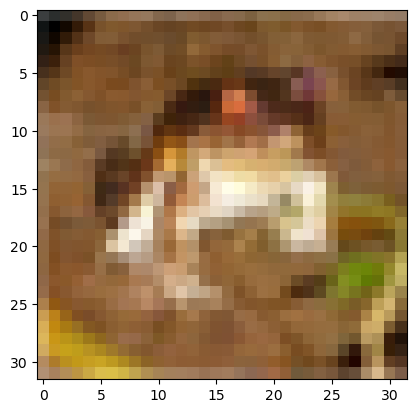

In [48]:
# Display first image
train_labels[0]
plt.imshow(train_images[0])

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


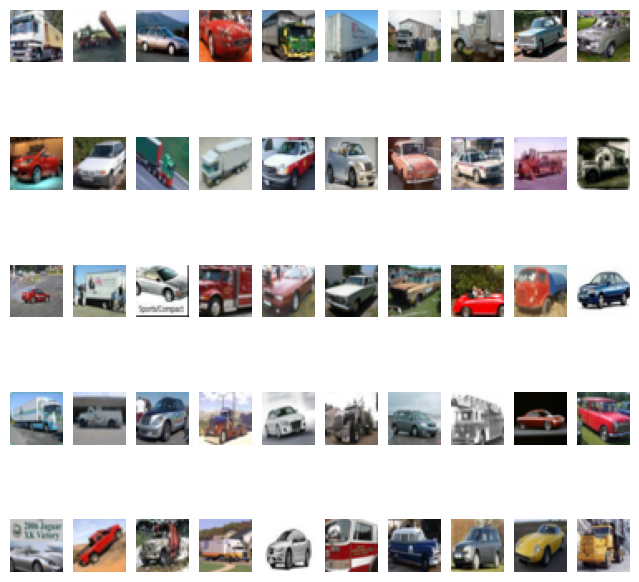

(10000, 32, 32, 3)
(10000, 1)
(2000, 32, 32, 3)
(2000, 1)


In [49]:
# Get just the cars (1) and trucks (9) 

print(train_images.shape)
print(train_labels.shape)

selected = [1,9]

flat = train_labels[:,0]
tc = np.where(np.isin(flat, selected))[0]
train_images = train_images[tc]
train_labels = train_labels[tc]

print(train_images.shape)
print(train_labels.shape)



fig, axs = plt.subplots(5, 10, figsize=(8,8))
axs = axs.flatten()
for i in range(50):
    axs[i].imshow(train_images[i])
    axs[i].axis('off')
plt.show()

# Do the same for test data

print(test_images.shape)
print(test_labels.shape)

flat = test_labels[:,0]
tc = np.where(np.isin(flat, selected))[0]
test_images = test_images[tc]
test_labels = test_labels[tc]

print(test_images.shape)
print(test_labels.shape)



In [50]:
# Image Preprocessing

# Normalize the pixel values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert the labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

train_labels[:10]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [52]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
313/313 [==============================] - 10s 27ms/step - loss: 0.6224 - accuracy: 0.6786 - val_loss: 0.4897 - val_accuracy: 0.7720
Epoch 2/10
313/313 [==============================] - 8s 27ms/step - loss: 0.4521 - accuracy: 0.7939 - val_loss: 0.4025 - val_accuracy: 0.8215
Epoch 3/10
313/313 [==============================] - 8s 25ms/step - loss: 0.3776 - accuracy: 0.8381 - val_loss: 0.3528 - val_accuracy: 0.8540
Epoch 4/10
313/313 [==============================] - 8s 26ms/step - loss: 0.3177 - accuracy: 0.8654 - val_loss: 0.3408 - val_accuracy: 0.8645
Epoch 5/10
313/313 [==============================] - 8s 25ms/step - loss: 0.2753 - accuracy: 0.8867 - val_loss: 0.2815 - val_accuracy: 0.8795
Epoch 6/10
313/313 [==============================] - 8s 24ms/step - loss: 0.2289 - accuracy: 0.9091 - val_loss: 0.2607 - val_accuracy: 0.9000
Epoch 7/10
313/313 [==============================] - 8s 25ms/step - loss: 0.2068 - accuracy: 0.9165 - val_loss: 0.2499 - val_accuracy: 0.903

In [53]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


63/63 [==============================] - 1s 7ms/step - loss: 0.2447 - accuracy: 0.9095
Test accuracy: 0.909500002861023


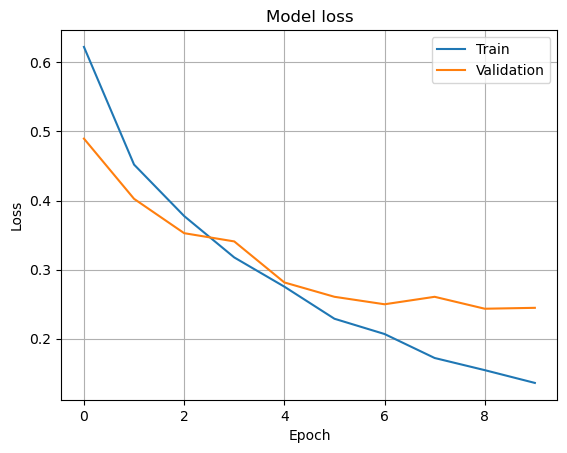

In [54]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()